In [ ]:
!pip install opencv-python torch 
!pip install easyocr


In [1]:
from utils import *

# EasyOCR

In [2]:
class EasyocrModel:
    def __init__(self,):
        self.detector = easyocr.Reader(['ru', 'en'], gpu=True)
        self.recognizer = easyocr.Reader(['ru', 'en'], gpu=True)

        return

    def detection_preprocessing(self, image):
        # v1
        preprocessed_image = image
        # v2
        # preprocessed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # v3
        # preprocessed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # preprocessed_image = cv2.adaptiveThreshold(
        #     preprocessed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        #     cv2.THRESH_BINARY, 21, 16
        # )
        # preprocessed_image = cv2.fastNlMeansDenoising(preprocessed_image, h=10, templateWindowSize=5, searchWindowSize=21)
        
        return preprocessed_image
    
    def recognition_preprocessing(self, image):
        # preprocessed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        preprocessed_image = image
        
        return preprocessed_image
    
    def detect(self, image):
        preprocessed_image = self.detection_preprocessing(image)

        detections = np.array(self.detector.detect(preprocessed_image)[0][0])
        detections[:,1], detections[:,2] = detections[:,2].copy(), detections[:,1].copy()

        return detections
        
    
    def recognize(self, image):
        preprocessed_image = self.recognition_preprocessing(image)
        recognitions = self.recognizer.recognize(preprocessed_image)
        recognitions = [x[1] for x in recognitions]

        return recognitions

        # texts = []
        # boxes = []
        # for (bbox, text, confidence) in predictions:
        #     # print(f"Текст: {text}, Точность: {confidence:.2f}")
        #     xyxy = list(map(int, bbox[0])) + list(map(int, bbox[2]))

        #     texts.append(text)
        #     boxes.append(xyxy)

        # return np.array(texts), np.array(boxes)

In [3]:
image = cv2.imread(f"datasets/detection/Documents-OCR-Detection-2/test/images/card_1_jpg.rf.57def24dab02262817c8c62ec30d69b9.jpg")

model = EasyocrModel()
model.recognize(image)

/Users/a.shkolin/VSCodeProjects/Master-Documents-OCR/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


['[Евуя']

In [ ]:
plt.imshow(draw_bboxes(image, [], model.detect(image)))

In [4]:
model = EasyocrModel()

detection_dataset_path = "datasets/detection/Documents-OCR-Detection-2/test"
detection_labels = read_detection_labels(detection_dataset_path)

recognition_dataset_path = "datasets/recognition/Documents-OCR-Recognition-2/test"
recognition_labels = read_recognition_labels(recognition_dataset_path)

ed = np.mean(eval_detection(model, detection_labels, detection_dataset_path), axis=1)
er = np.mean(eval_recognition(model, recognition_labels, recognition_dataset_path))

100%|██████████| 826/826 [00:16<00:00, 50.30it/s]


In [5]:
print(ed)
print(er)

[0.83095263 0.90820614 0.90733401]
0.24482537273238866


In [ ]:
"eval_card_2_jpg.rf.59d7715a399d7a1ddb139a4b7a4b44d0.jpg"
"eval_card_9_jpg.rf.fbb32baf343956a793f40ccca045f2c1.jpg"
Плохо детектирует отдельные цифры в ВУ

# PaddleOCR

In [6]:
from paddleocr import PaddleOCR

/Users/a.shkolin/VSCodeProjects/Master-Documents-OCR/.venv/lib/python3.12/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
/Users/a.shkolin/VSCodeProjects/Master-Documents-OCR/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
class PaddleocrModel:
    def __init__(self,):
        self.detector = PaddleOCR(lang="en",
            text_detection_model_name="PP-OCRv5_server_det",
            text_recognition_model_name="PP-OCRv5_server_rec",
            use_doc_orientation_classify=False,
            # use_doc_unwarping=False,
            # use_textline_orientation=False,
            show_log=False,
            det=True,
            rec=False)  # только детектирование
        
        self.recognizer = PaddleOCR(lang="en",
            text_detection_model_name="PP-OCRv5_server_det",
            text_recognition_model_name="PP-OCRv5_server_rec",
            use_doc_orientation_classify=False,
            # use_doc_unwarping=False,
            # use_textline_orientation=False,
            show_log=False,
            det=False,
            rec=True)

        return

    def detection_preprocessing(self, image):
        # v1
        preprocessed_image = image
        # v2
        # preprocessed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # v3
        # preprocessed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # preprocessed_image = cv2.adaptiveThreshold(
        #     preprocessed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        #     cv2.THRESH_BINARY, 21, 16
        # )
        # preprocessed_image = cv2.fastNlMeansDenoising(preprocessed_image, h=10, templateWindowSize=5, searchWindowSize=21)
        
        return preprocessed_image
    
    def recognition_preprocessing(self, image):
        # preprocessed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        preprocessed_image = image
        
        return preprocessed_image
    
    def detect(self, image):
        preprocessed_image = self.detection_preprocessing(image)

        detections = np.array(self.detector.ocr(preprocessed_image, det=True, rec=False)[0])
        # detections = [[int(bbox[0][0]), int(bbox[0][1]), int(bbox[2][0]), int(bbox[2][1])] for bbox in detections]
        detections = [(xs + ys) for xs, ys in zip(np.array(detections, dtype=int).min(axis=(1)).tolist(), np.array(detections, dtype=int).max(axis=(1)).tolist())]

        return detections
        
    
    def recognize(self, image):
        preprocessed_image = self.recognition_preprocessing(image)
        recognitions = self.recognizer.ocr(preprocessed_image)[0]
        if recognitions is None:
            return ''
        else:
            recognitions = " ".join([x[1][0] for x in recognitions])

        return recognitions

In [47]:
image = cv2.imread(f"datasets/recognition/Documents-OCR-Recognition-2/test/card_1_1_jpg.rf.6b4441e999ee08b24b19adeb0e5d17fb.jpg")

model = PaddleocrModel()
# plt.imshow(draw_bboxes(image, [], model.detect(image)))

In [49]:
# ed = np.mean(eval_detection(model, detection_labels, detection_dataset_path), axis=1)
er = np.mean(eval_recognition(model, recognition_labels, recognition_dataset_path))
# print(ed)
print(er)

  0%|          | 0/826 [00:00<?, ?it/s]

[2025/05/24 19:21:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  0%|          | 1/826 [00:00<05:13,  2.63it/s]

[2025/05/24 19:21:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  0%|          | 4/826 [00:00<01:30,  9.10it/s]

[2025/05/24 19:21:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  1%|          | 6/826 [00:00<01:49,  7.47it/s]

[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  1%|▏         | 11/826 [00:01<01:06, 12.32it/s]

[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  2%|▏         | 13/826 [00:01<01:10, 11.49it/s]

[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  2%|▏         | 15/826 [00:01<01:36,  8.38it/s]

[2025/05/24 19:21:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  2%|▏         | 17/826 [00:01<01:40,  8.07it/s]

[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  2%|▏         | 19/826 [00:02<01:27,  9.26it/s]

[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  3%|▎         | 21/826 [00:02<01:35,  8.39it/s]

[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  3%|▎         | 23/826 [00:02<01:26,  9.24it/s]

[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  3%|▎         | 25/826 [00:02<01:21,  9.82it/s]

[2025/05/24 19:21:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  3%|▎         | 27/826 [00:02<01:13, 10.81it/s]

[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  4%|▎         | 29/826 [00:03<01:12, 11.00it/s]

[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  4%|▍         | 31/826 [00:03<01:11, 11.14it/s]

[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  4%|▍         | 33/826 [00:03<01:24,  9.37it/s]

[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  4%|▍         | 35/826 [00:03<01:35,  8.29it/s]

[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  4%|▍         | 37/826 [00:03<01:19,  9.92it/s]

[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  5%|▍         | 39/826 [00:04<01:14, 10.55it/s]

[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  5%|▌         | 42/826 [00:04<01:18,  9.99it/s]

[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  5%|▌         | 44/826 [00:04<01:11, 10.90it/s]

[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  6%|▌         | 46/826 [00:04<01:13, 10.61it/s]

[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  6%|▌         | 48/826 [00:04<01:17, 10.04it/s]

[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  6%|▌         | 50/826 [00:05<01:17, 10.03it/s]

[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  6%|▋         | 52/826 [00:05<01:19,  9.75it/s]

[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  7%|▋         | 54/826 [00:05<01:10, 10.88it/s]

[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  7%|▋         | 57/826 [00:05<01:07, 11.32it/s]

[2025/05/24 19:21:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  7%|▋         | 59/826 [00:06<01:14, 10.25it/s]

[2025/05/24 19:21:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  7%|▋         | 61/826 [00:06<01:06, 11.56it/s]

[2025/05/24 19:21:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  8%|▊         | 63/826 [00:06<01:21,  9.31it/s]

[2025/05/24 19:21:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  8%|▊         | 65/826 [00:06<01:43,  7.36it/s]

[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  8%|▊         | 67/826 [00:07<01:27,  8.63it/s]

[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  8%|▊         | 69/826 [00:07<01:16,  9.95it/s]

[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  9%|▊         | 71/826 [00:07<01:08, 11.04it/s]

[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  9%|▉         | 73/826 [00:07<01:04, 11.63it/s]

[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


  9%|▉         | 75/826 [00:07<01:03, 11.89it/s]

[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 10%|▉         | 80/826 [00:07<00:46, 16.18it/s]

[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 10%|█         | 83/826 [00:07<00:42, 17.32it/s]

[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 10%|█         | 85/826 [00:08<00:56, 13.15it/s]

[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 11%|█         | 87/826 [00:08<01:06, 11.18it/s]

[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 11%|█         | 90/826 [00:08<01:08, 10.71it/s]

[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 11%|█         | 92/826 [00:09<01:12, 10.11it/s]

[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 12%|█▏        | 95/826 [00:09<01:00, 12.12it/s]

[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 12%|█▏        | 97/826 [00:09<01:13,  9.93it/s]

[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 12%|█▏        | 99/826 [00:09<01:13,  9.90it/s]

[2025/05/24 19:21:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 12%|█▏        | 101/826 [00:09<01:07, 10.79it/s]

[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 12%|█▏        | 103/826 [00:10<01:16,  9.48it/s]

[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 13%|█▎        | 105/826 [00:10<01:20,  8.98it/s]

[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 13%|█▎        | 109/826 [00:10<01:15,  9.53it/s]

[2025/05/24 19:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 14%|█▎        | 112/826 [00:10<01:01, 11.63it/s]

[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 14%|█▍        | 114/826 [00:11<01:10, 10.05it/s]

[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 14%|█▍        | 116/826 [00:11<01:07, 10.48it/s]

[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 14%|█▍        | 118/826 [00:11<01:09, 10.15it/s]

[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 15%|█▍        | 120/826 [00:11<01:24,  8.39it/s]

[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 15%|█▍        | 123/826 [00:12<01:05, 10.79it/s]

[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 15%|█▌        | 125/826 [00:12<01:16,  9.18it/s]

[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 15%|█▌        | 128/826 [00:12<01:01, 11.44it/s]

[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 16%|█▌        | 130/826 [00:12<01:03, 10.90it/s]

[2025/05/24 19:21:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 16%|█▌        | 132/826 [00:12<01:07, 10.24it/s]

[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 16%|█▋        | 135/826 [00:13<00:52, 13.14it/s]

[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 17%|█▋        | 137/826 [00:13<00:54, 12.70it/s]

[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 17%|█▋        | 139/826 [00:13<00:59, 11.56it/s]

[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 17%|█▋        | 142/826 [00:13<00:49, 13.73it/s]

[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 17%|█▋        | 144/826 [00:13<00:57, 11.83it/s]

[2025/05/24 19:21:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 18%|█▊        | 146/826 [00:14<01:02, 10.91it/s]

[2025/05/24 19:21:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 18%|█▊        | 148/826 [00:14<01:11,  9.47it/s]

[2025/05/24 19:21:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 18%|█▊        | 150/826 [00:14<01:14,  9.02it/s]

[2025/05/24 19:21:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 18%|█▊        | 151/826 [00:14<01:19,  8.48it/s]

[2025/05/24 19:21:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 19%|█▊        | 153/826 [00:14<01:16,  8.83it/s]

[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 19%|█▊        | 154/826 [00:15<01:27,  7.68it/s]

[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 19%|█▉        | 155/826 [00:15<01:29,  7.53it/s]

[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 19%|█▉        | 157/826 [00:15<01:17,  8.58it/s]

[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 19%|█▉        | 159/826 [00:15<01:06, 10.10it/s]

[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 19%|█▉        | 161/826 [00:15<01:12,  9.15it/s]

[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 20%|█▉        | 163/826 [00:15<01:03, 10.47it/s]

[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 20%|█▉        | 165/826 [00:16<01:11,  9.28it/s]

[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 20%|██        | 169/826 [00:16<00:48, 13.55it/s]

[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 21%|██        | 171/826 [00:16<01:06,  9.86it/s]

[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 21%|██        | 175/826 [00:16<00:49, 13.12it/s]

[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 21%|██▏       | 177/826 [00:17<00:47, 13.74it/s]

[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 22%|██▏       | 179/826 [00:17<00:55, 11.65it/s]

[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 22%|██▏       | 181/826 [00:17<01:02, 10.39it/s]

[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 22%|██▏       | 184/826 [00:17<00:50, 12.78it/s]

[2025/05/24 19:21:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 23%|██▎       | 186/826 [00:17<01:00, 10.54it/s]

[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 23%|██▎       | 188/826 [00:18<01:07,  9.43it/s]

[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 23%|██▎       | 190/826 [00:18<01:05,  9.78it/s]

[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 23%|██▎       | 192/826 [00:18<00:59, 10.69it/s]

[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 23%|██▎       | 194/826 [00:18<00:54, 11.69it/s]

[2025/05/24 19:21:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 24%|██▎       | 196/826 [00:18<00:57, 10.90it/s]

[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 24%|██▍       | 198/826 [00:19<00:58, 10.65it/s]

[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 24%|██▍       | 200/826 [00:19<00:56, 11.10it/s]

[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 24%|██▍       | 202/826 [00:19<00:52, 11.96it/s]

[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 25%|██▍       | 204/826 [00:19<00:52, 11.88it/s]

[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 25%|██▍       | 206/826 [00:19<01:02,  9.87it/s]

[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 25%|██▌       | 208/826 [00:19<00:54, 11.31it/s]

[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 25%|██▌       | 210/826 [00:20<00:57, 10.70it/s]

[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 26%|██▌       | 212/826 [00:20<00:59, 10.35it/s]

[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 26%|██▌       | 214/826 [00:20<01:00, 10.11it/s]

[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 26%|██▌       | 216/826 [00:20<01:02,  9.79it/s]

[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 26%|██▋       | 218/826 [00:21<01:07,  9.00it/s]

[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 27%|██▋       | 219/826 [00:21<01:07,  8.97it/s]

[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 27%|██▋       | 221/826 [00:21<00:58, 10.36it/s]

[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 27%|██▋       | 223/826 [00:21<00:52, 11.40it/s]

[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:21] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 27%|██▋       | 225/826 [00:21<01:05,  9.23it/s]

[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 27%|██▋       | 227/826 [00:21<00:58, 10.30it/s]

[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 28%|██▊       | 229/826 [00:22<01:00,  9.88it/s]

[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 28%|██▊       | 231/826 [00:22<00:58, 10.25it/s]

[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 28%|██▊       | 233/826 [00:22<00:58, 10.06it/s]

[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 28%|██▊       | 235/826 [00:22<00:50, 11.78it/s]

[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:22] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 29%|██▊       | 237/826 [00:22<00:57, 10.29it/s]

[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 29%|██▉       | 240/826 [00:23<00:50, 11.65it/s]

[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 29%|██▉       | 242/826 [00:23<00:47, 12.39it/s]

[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 30%|██▉       | 244/826 [00:23<00:54, 10.66it/s]

[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 30%|██▉       | 247/826 [00:23<00:44, 13.08it/s]

[2025/05/24 19:21:23] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 30%|███       | 249/826 [00:23<00:56, 10.29it/s]

[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 30%|███       | 251/826 [00:24<01:07,  8.48it/s]

[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 31%|███       | 255/826 [00:24<00:50, 11.33it/s]

[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 31%|███       | 257/826 [00:24<00:53, 10.62it/s]

[2025/05/24 19:21:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 31%|███▏      | 259/826 [00:24<00:48, 11.70it/s]

[2025/05/24 19:21:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 32%|███▏      | 261/826 [00:25<01:02,  9.06it/s]

[2025/05/24 19:21:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 32%|███▏      | 263/826 [00:25<01:13,  7.65it/s]

[2025/05/24 19:21:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 32%|███▏      | 265/826 [00:25<01:04,  8.65it/s]

[2025/05/24 19:21:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 32%|███▏      | 268/826 [00:25<00:50, 11.13it/s]

[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 33%|███▎      | 270/826 [00:26<00:46, 11.92it/s]

[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 33%|███▎      | 272/826 [00:26<00:50, 10.89it/s]

[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 33%|███▎      | 274/826 [00:26<00:52, 10.48it/s]

[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 33%|███▎      | 276/826 [00:26<00:51, 10.61it/s]

[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 34%|███▎      | 278/826 [00:26<00:47, 11.58it/s]

[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 34%|███▍      | 280/826 [00:26<00:45, 12.13it/s]

[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 34%|███▍      | 282/826 [00:27<00:53, 10.23it/s]

[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 34%|███▍      | 284/826 [00:27<00:51, 10.54it/s]

[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 35%|███▍      | 286/826 [00:27<00:51, 10.52it/s]

[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 35%|███▌      | 290/826 [00:27<00:36, 14.68it/s]

[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 36%|███▌      | 295/826 [00:27<00:27, 19.66it/s]

[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 36%|███▌      | 298/826 [00:28<00:38, 13.56it/s]

[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 36%|███▋      | 300/826 [00:28<00:51, 10.20it/s]

[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 37%|███▋      | 302/826 [00:28<00:47, 11.00it/s]

[2025/05/24 19:21:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 37%|███▋      | 304/826 [00:28<00:49, 10.56it/s]

[2025/05/24 19:21:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 37%|███▋      | 306/826 [00:29<00:50, 10.20it/s]

[2025/05/24 19:21:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 37%|███▋      | 308/826 [00:29<01:01,  8.44it/s]

[2025/05/24 19:21:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 38%|███▊      | 310/826 [00:29<00:57,  8.99it/s]

[2025/05/24 19:21:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 38%|███▊      | 312/826 [00:29<01:00,  8.47it/s]

[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 38%|███▊      | 314/826 [00:30<01:02,  8.16it/s]

[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 38%|███▊      | 317/826 [00:30<00:48, 10.41it/s]

[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 39%|███▊      | 319/826 [00:30<00:50, 10.11it/s]

[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 39%|███▉      | 322/826 [00:30<00:42, 11.98it/s]

[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 39%|███▉      | 324/826 [00:30<00:44, 11.37it/s]

[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 39%|███▉      | 326/826 [00:31<00:50,  9.95it/s]

[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 40%|███▉      | 328/826 [00:31<00:46, 10.63it/s]

[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 40%|███▉      | 330/826 [00:31<00:42, 11.58it/s]

[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 40%|████      | 332/826 [00:31<00:44, 10.98it/s]

[2025/05/24 19:21:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 40%|████      | 334/826 [00:32<00:56,  8.78it/s]

[2025/05/24 19:21:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 41%|████      | 336/826 [00:32<00:56,  8.73it/s]

[2025/05/24 19:21:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 41%|████      | 337/826 [00:32<01:02,  7.77it/s]

[2025/05/24 19:21:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 41%|████      | 338/826 [00:32<01:01,  7.97it/s]

[2025/05/24 19:21:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 41%|████▏     | 341/826 [00:32<00:46, 10.47it/s]

[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 42%|████▏     | 343/826 [00:32<00:46, 10.46it/s]

[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 42%|████▏     | 345/826 [00:33<00:45, 10.68it/s]

[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 42%|████▏     | 347/826 [00:33<00:46, 10.29it/s]

[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 42%|████▏     | 349/826 [00:33<00:52,  9.07it/s]

[2025/05/24 19:21:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 42%|████▏     | 350/826 [00:33<00:55,  8.53it/s]

[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 42%|████▏     | 351/826 [00:33<00:54,  8.75it/s]

[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 43%|████▎     | 352/826 [00:34<00:57,  8.21it/s]

[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 43%|████▎     | 353/826 [00:34<01:02,  7.60it/s]

[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 43%|████▎     | 355/826 [00:34<00:49,  9.52it/s]

[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 43%|████▎     | 358/826 [00:34<00:33, 13.79it/s]

[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 44%|████▎     | 360/826 [00:34<00:34, 13.40it/s]

[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 44%|████▍     | 362/826 [00:34<00:32, 14.33it/s]

[2025/05/24 19:21:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 44%|████▍     | 364/826 [00:34<00:34, 13.35it/s]

[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 44%|████▍     | 367/826 [00:35<00:29, 15.62it/s]

[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 45%|████▍     | 369/826 [00:35<00:28, 15.78it/s]

[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 45%|████▍     | 371/826 [00:35<00:28, 16.00it/s]

[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 45%|████▌     | 373/826 [00:35<00:36, 12.33it/s]

[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 45%|████▌     | 375/826 [00:35<00:41, 10.79it/s]

[2025/05/24 19:21:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 46%|████▌     | 377/826 [00:36<00:42, 10.52it/s]

[2025/05/24 19:21:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 46%|████▌     | 379/826 [00:36<00:57,  7.72it/s]

[2025/05/24 19:21:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 46%|████▌     | 380/826 [00:36<00:59,  7.56it/s]

[2025/05/24 19:21:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 46%|████▌     | 382/826 [00:36<00:50,  8.78it/s]

[2025/05/24 19:21:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 46%|████▋     | 384/826 [00:36<00:52,  8.43it/s]

[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 47%|████▋     | 386/826 [00:37<00:48,  9.07it/s]

[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 47%|████▋     | 389/826 [00:37<00:40, 10.82it/s]

[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 47%|████▋     | 391/826 [00:37<00:37, 11.72it/s]

[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 48%|████▊     | 395/826 [00:37<00:27, 15.76it/s]

[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 48%|████▊     | 397/826 [00:37<00:29, 14.74it/s]

[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 48%|████▊     | 399/826 [00:37<00:28, 14.83it/s]

[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 49%|████▊     | 401/826 [00:38<00:36, 11.51it/s]

[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 49%|████▉     | 403/826 [00:38<00:34, 12.13it/s]

[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 49%|████▉     | 405/826 [00:38<00:37, 11.28it/s]

[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 49%|████▉     | 407/826 [00:38<00:35, 11.74it/s]

[2025/05/24 19:21:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 50%|████▉     | 410/826 [00:38<00:29, 14.20it/s]

[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 50%|████▉     | 412/826 [00:39<00:31, 13.27it/s]

[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 50%|█████     | 414/826 [00:39<00:37, 11.08it/s]

[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 50%|█████     | 416/826 [00:39<00:37, 11.04it/s]

[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 51%|█████     | 418/826 [00:39<00:38, 10.49it/s]

[2025/05/24 19:21:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 51%|█████     | 420/826 [00:39<00:44,  9.10it/s]

[2025/05/24 19:21:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 51%|█████     | 421/826 [00:40<00:48,  8.36it/s]

[2025/05/24 19:21:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 51%|█████     | 423/826 [00:40<00:45,  8.88it/s]

[2025/05/24 19:21:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 52%|█████▏    | 426/826 [00:40<00:34, 11.73it/s]

[2025/05/24 19:21:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 52%|█████▏    | 428/826 [00:40<00:43,  9.11it/s]

[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 52%|█████▏    | 430/826 [00:41<00:41,  9.56it/s]

[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 52%|█████▏    | 432/826 [00:41<00:38, 10.35it/s]

[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 53%|█████▎    | 434/826 [00:41<00:34, 11.40it/s]

[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 53%|█████▎    | 439/826 [00:41<00:24, 15.91it/s]

[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 54%|█████▎    | 442/826 [00:41<00:25, 14.82it/s]

[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 54%|█████▍    | 445/826 [00:41<00:22, 17.29it/s]

[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 54%|█████▍    | 447/826 [00:42<00:29, 13.01it/s]

[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 55%|█████▍    | 451/826 [00:42<00:24, 15.02it/s]

[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 55%|█████▍    | 453/826 [00:42<00:28, 13.19it/s]

[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 55%|█████▌    | 456/826 [00:42<00:24, 15.08it/s]

[2025/05/24 19:21:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 55%|█████▌    | 458/826 [00:42<00:23, 15.96it/s]

[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 56%|█████▌    | 460/826 [00:42<00:23, 15.76it/s]

[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 56%|█████▌    | 463/826 [00:43<00:20, 17.42it/s]

[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 56%|█████▋    | 466/826 [00:43<00:26, 13.49it/s]

[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 57%|█████▋    | 468/826 [00:43<00:35, 10.15it/s]

[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 57%|█████▋    | 470/826 [00:43<00:37,  9.55it/s]

[2025/05/24 19:21:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 57%|█████▋    | 472/826 [00:44<00:36,  9.65it/s]

[2025/05/24 19:21:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 57%|█████▋    | 474/826 [00:44<00:38,  9.09it/s]

[2025/05/24 19:21:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 58%|█████▊    | 475/826 [00:44<00:44,  7.95it/s]

[2025/05/24 19:21:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 58%|█████▊    | 478/826 [00:44<00:32, 10.70it/s]

[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 58%|█████▊    | 481/826 [00:45<00:30, 11.33it/s]

[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 58%|█████▊    | 483/826 [00:45<00:29, 11.58it/s]

[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 59%|█████▉    | 486/826 [00:45<00:26, 12.81it/s]

[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 59%|█████▉    | 488/826 [00:45<00:26, 12.80it/s]

[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 59%|█████▉    | 490/826 [00:45<00:25, 13.40it/s]

[2025/05/24 19:21:45] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 60%|█████▉    | 492/826 [00:45<00:22, 14.57it/s]

[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 60%|█████▉    | 494/826 [00:45<00:23, 14.23it/s]

[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 60%|██████    | 496/826 [00:46<00:24, 13.62it/s]

[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 60%|██████    | 498/826 [00:46<00:26, 12.54it/s]

[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 61%|██████    | 500/826 [00:46<00:27, 11.97it/s]

[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 61%|██████    | 502/826 [00:46<00:25, 12.48it/s]

[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 61%|██████    | 505/826 [00:46<00:30, 10.66it/s]

[2025/05/24 19:21:47] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:47] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 61%|██████▏   | 507/826 [00:47<00:35,  9.07it/s]

[2025/05/24 19:21:47] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:47] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 62%|██████▏   | 509/826 [00:47<00:32,  9.81it/s]

[2025/05/24 19:21:47] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:47] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 62%|██████▏   | 511/826 [00:47<00:42,  7.49it/s]

[2025/05/24 19:21:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 62%|██████▏   | 512/826 [00:48<00:43,  7.18it/s]

[2025/05/24 19:21:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 62%|██████▏   | 514/826 [00:48<00:38,  8.05it/s]

[2025/05/24 19:21:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 62%|██████▏   | 515/826 [00:48<00:38,  7.98it/s]

[2025/05/24 19:21:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 62%|██████▏   | 516/826 [00:48<00:41,  7.49it/s]

[2025/05/24 19:21:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 63%|██████▎   | 517/826 [00:48<00:40,  7.68it/s]

[2025/05/24 19:21:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 63%|██████▎   | 519/826 [00:48<00:35,  8.53it/s]

[2025/05/24 19:21:49] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 63%|██████▎   | 520/826 [00:48<00:37,  8.16it/s]

[2025/05/24 19:21:49] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 63%|██████▎   | 521/826 [00:49<00:44,  6.86it/s]

[2025/05/24 19:21:49] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 63%|██████▎   | 522/826 [00:49<00:47,  6.45it/s]

[2025/05/24 19:21:49] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 63%|██████▎   | 523/826 [00:49<00:53,  5.67it/s]

[2025/05/24 19:21:49] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:49] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 64%|██████▎   | 525/826 [00:49<00:43,  6.85it/s]

[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 64%|██████▍   | 527/826 [00:49<00:35,  8.54it/s]

[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 64%|██████▍   | 528/826 [00:50<00:40,  7.36it/s]

[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 64%|██████▍   | 530/826 [00:50<00:35,  8.40it/s]

[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 65%|██████▍   | 533/826 [00:50<00:31,  9.33it/s]

[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 65%|██████▍   | 535/826 [00:50<00:34,  8.46it/s]

[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 65%|██████▍   | 536/826 [00:50<00:33,  8.68it/s]

[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 65%|██████▌   | 537/826 [00:51<00:39,  7.24it/s]

[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 65%|██████▌   | 541/826 [00:51<00:25, 11.36it/s]

[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 66%|██████▌   | 543/826 [00:51<00:26, 10.64it/s]

[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 66%|██████▌   | 545/826 [00:51<00:24, 11.62it/s]

[2025/05/24 19:21:51] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 66%|██████▌   | 547/826 [00:52<00:27, 10.13it/s]

[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 67%|██████▋   | 550/826 [00:52<00:23, 11.68it/s]

[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 67%|██████▋   | 552/826 [00:52<00:21, 12.91it/s]

[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 67%|██████▋   | 554/826 [00:52<00:25, 10.50it/s]

[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 67%|██████▋   | 556/826 [00:52<00:28,  9.47it/s]

[2025/05/24 19:21:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 68%|██████▊   | 558/826 [00:53<00:31,  8.42it/s]

[2025/05/24 19:21:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 68%|██████▊   | 559/826 [00:53<00:35,  7.51it/s]

[2025/05/24 19:21:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 68%|██████▊   | 561/826 [00:53<00:32,  8.24it/s]

[2025/05/24 19:21:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 68%|██████▊   | 562/826 [00:53<00:33,  7.88it/s]

[2025/05/24 19:21:53] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 68%|██████▊   | 564/826 [00:53<00:27,  9.45it/s]

[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 69%|██████▊   | 566/826 [00:54<00:31,  8.23it/s]

[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 69%|██████▊   | 567/826 [00:54<00:34,  7.44it/s]

[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 69%|██████▉   | 569/826 [00:54<00:30,  8.48it/s]

[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 69%|██████▉   | 570/826 [00:54<00:29,  8.60it/s]

[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 69%|██████▉   | 571/826 [00:54<00:29,  8.76it/s]

[2025/05/24 19:21:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 69%|██████▉   | 573/826 [00:54<00:28,  8.81it/s]

[2025/05/24 19:21:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 70%|██████▉   | 575/826 [00:55<00:23, 10.90it/s]

[2025/05/24 19:21:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 70%|██████▉   | 577/826 [00:55<00:32,  7.58it/s]

[2025/05/24 19:21:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 70%|██████▉   | 578/826 [00:55<00:32,  7.52it/s]

[2025/05/24 19:21:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 70%|███████   | 580/826 [00:55<00:31,  7.72it/s]

[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 70%|███████   | 582/826 [00:55<00:26,  9.23it/s]

[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 71%|███████   | 584/826 [00:56<00:26,  9.07it/s]

[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 71%|███████   | 586/826 [00:56<00:23, 10.38it/s]

[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 71%|███████   | 588/826 [00:56<00:20, 11.42it/s]

[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 71%|███████▏  | 590/826 [00:56<00:19, 12.32it/s]

[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 72%|███████▏  | 592/826 [00:56<00:17, 13.44it/s]

[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 72%|███████▏  | 594/826 [00:57<00:40,  5.78it/s]

[2025/05/24 19:21:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 72%|███████▏  | 598/826 [00:57<00:27,  8.36it/s]

[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 73%|███████▎  | 600/826 [00:58<00:29,  7.68it/s]

[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 73%|███████▎  | 603/826 [00:58<00:23,  9.38it/s]

[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 73%|███████▎  | 605/826 [00:58<00:24,  9.04it/s]

[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 73%|███████▎  | 607/826 [00:58<00:24,  9.06it/s]

[2025/05/24 19:21:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 74%|███████▎  | 609/826 [00:58<00:21, 10.15it/s]

[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 74%|███████▍  | 611/826 [00:59<00:24,  8.89it/s]

[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 74%|███████▍  | 613/826 [00:59<00:22,  9.35it/s]

[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 74%|███████▍  | 615/826 [00:59<00:25,  8.17it/s]

[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:21:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 75%|███████▍  | 617/826 [00:59<00:22,  9.39it/s]

[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 75%|███████▍  | 619/826 [01:00<00:23,  8.75it/s]

[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 75%|███████▌  | 621/826 [01:00<00:22,  9.26it/s]

[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 75%|███████▌  | 623/826 [01:00<00:20,  9.89it/s]

[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 76%|███████▌  | 625/826 [01:00<00:20,  9.61it/s]

[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:00] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 76%|███████▌  | 629/826 [01:00<00:14, 13.45it/s]

[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 77%|███████▋  | 632/826 [01:00<00:12, 15.91it/s]

[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 77%|███████▋  | 634/826 [01:01<00:12, 14.95it/s]

[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 77%|███████▋  | 636/826 [01:01<00:13, 14.36it/s]

[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 77%|███████▋  | 638/826 [01:01<00:12, 14.49it/s]

[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 77%|███████▋  | 640/826 [01:01<00:13, 13.31it/s]

[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:01] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 78%|███████▊  | 643/826 [01:01<00:12, 14.13it/s]

[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 78%|███████▊  | 645/826 [01:01<00:12, 13.93it/s]

[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 78%|███████▊  | 647/826 [01:02<00:12, 14.27it/s]

[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 79%|███████▊  | 650/826 [01:02<00:10, 16.33it/s]

[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 79%|███████▉  | 652/826 [01:02<00:10, 15.95it/s]

[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 79%|███████▉  | 654/826 [01:02<00:14, 12.23it/s]

[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 79%|███████▉  | 656/826 [01:02<00:14, 11.57it/s]

[2025/05/24 19:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 80%|███████▉  | 658/826 [01:03<00:15, 10.58it/s]

[2025/05/24 19:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 80%|███████▉  | 660/826 [01:03<00:15, 11.02it/s]

[2025/05/24 19:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 80%|████████  | 662/826 [01:03<00:19,  8.21it/s]

[2025/05/24 19:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 80%|████████  | 663/826 [01:03<00:19,  8.22it/s]

[2025/05/24 19:22:03] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 80%|████████  | 664/826 [01:03<00:19,  8.29it/s]

[2025/05/24 19:22:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 81%|████████  | 665/826 [01:04<00:23,  6.83it/s]

[2025/05/24 19:22:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 81%|████████  | 668/826 [01:04<00:17,  8.88it/s]

[2025/05/24 19:22:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 81%|████████  | 669/826 [01:04<00:19,  8.09it/s]

[2025/05/24 19:22:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 81%|████████  | 671/826 [01:04<00:19,  7.82it/s]

[2025/05/24 19:22:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 81%|████████▏ | 673/826 [01:04<00:17,  8.98it/s]

[2025/05/24 19:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 82%|████████▏ | 674/826 [01:05<00:20,  7.40it/s]

[2025/05/24 19:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 82%|████████▏ | 678/826 [01:05<00:15,  9.27it/s]

[2025/05/24 19:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:05] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 82%|████████▏ | 680/826 [01:05<00:18,  7.71it/s]

[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 82%|████████▏ | 681/826 [01:06<00:23,  6.30it/s]

[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 83%|████████▎ | 683/826 [01:06<00:17,  7.96it/s]

[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 83%|████████▎ | 685/826 [01:06<00:15,  9.09it/s]

[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 83%|████████▎ | 687/826 [01:06<00:13, 10.00it/s]

[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 83%|████████▎ | 689/826 [01:06<00:11, 11.70it/s]

[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 84%|████████▎ | 691/826 [01:06<00:11, 11.94it/s]

[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 84%|████████▍ | 693/826 [01:07<00:13, 10.19it/s]

[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 84%|████████▍ | 695/826 [01:07<00:15,  8.33it/s]

[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 85%|████████▍ | 698/826 [01:07<00:12,  9.95it/s]

[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 85%|████████▍ | 700/826 [01:07<00:11, 10.96it/s]

[2025/05/24 19:22:07] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 85%|████████▌ | 703/826 [01:07<00:10, 12.30it/s]

[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 85%|████████▌ | 705/826 [01:08<00:10, 11.79it/s]

[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 86%|████████▌ | 708/826 [01:08<00:08, 14.06it/s]

[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 86%|████████▌ | 710/826 [01:08<00:09, 12.19it/s]

[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 86%|████████▌ | 712/826 [01:08<00:09, 12.43it/s]

[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 86%|████████▋ | 714/826 [01:08<00:08, 12.90it/s]

[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 87%|████████▋ | 716/826 [01:09<00:10, 10.98it/s]

[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 87%|████████▋ | 718/826 [01:09<00:12,  8.45it/s]

[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 87%|████████▋ | 719/826 [01:09<00:13,  7.82it/s]

[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 87%|████████▋ | 721/826 [01:09<00:11,  9.27it/s]

[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 88%|████████▊ | 724/826 [01:09<00:09, 10.75it/s]

[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 88%|████████▊ | 726/826 [01:10<00:08, 11.91it/s]

[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 88%|████████▊ | 728/826 [01:10<00:10,  9.67it/s]

[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 88%|████████▊ | 730/826 [01:10<00:10,  9.09it/s]

[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 89%|████████▊ | 732/826 [01:10<00:09, 10.28it/s]

[2025/05/24 19:22:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 89%|████████▉ | 734/826 [01:10<00:08, 10.92it/s]

[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 89%|████████▉ | 736/826 [01:11<00:08, 10.91it/s]

[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 89%|████████▉ | 738/826 [01:11<00:08, 10.67it/s]

[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 90%|████████▉ | 740/826 [01:11<00:09,  9.48it/s]

[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 90%|████████▉ | 742/826 [01:11<00:08, 10.41it/s]

[2025/05/24 19:22:11] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 90%|█████████ | 744/826 [01:11<00:07, 11.25it/s]

[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 90%|█████████ | 747/826 [01:11<00:05, 13.80it/s]

[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 91%|█████████ | 749/826 [01:12<00:05, 14.12it/s]

[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 91%|█████████ | 751/826 [01:12<00:05, 13.80it/s]

[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 91%|█████████ | 753/826 [01:12<00:05, 14.14it/s]

[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 92%|█████████▏| 756/826 [01:12<00:05, 12.31it/s]

[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:12] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 92%|█████████▏| 760/826 [01:12<00:03, 16.56it/s]

[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 92%|█████████▏| 762/826 [01:13<00:04, 12.96it/s]

[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 92%|█████████▏| 764/826 [01:13<00:04, 12.67it/s]

[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 93%|█████████▎| 767/826 [01:13<00:04, 14.71it/s]

[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 93%|█████████▎| 769/826 [01:13<00:04, 14.14it/s]

[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 93%|█████████▎| 771/826 [01:13<00:04, 13.54it/s]

[2025/05/24 19:22:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 94%|█████████▎| 773/826 [01:13<00:04, 11.48it/s]

[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 94%|█████████▍| 775/826 [01:14<00:05,  9.25it/s]

[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 94%|█████████▍| 777/826 [01:14<00:04,  9.89it/s]

[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 94%|█████████▍| 779/826 [01:14<00:04,  9.71it/s]

[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:14] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 95%|█████████▍| 781/826 [01:14<00:04, 10.51it/s]

[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 95%|█████████▍| 783/826 [01:15<00:04, 10.52it/s]

[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 95%|█████████▌| 786/826 [01:15<00:03, 11.27it/s]

[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 95%|█████████▌| 788/826 [01:15<00:04,  9.16it/s]

[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 96%|█████████▌| 790/826 [01:15<00:03,  9.97it/s]

[2025/05/24 19:22:15] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 96%|█████████▌| 793/826 [01:15<00:03, 10.52it/s]

[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 96%|█████████▌| 795/826 [01:16<00:02, 11.09it/s]

[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 96%|█████████▋| 797/826 [01:16<00:03,  8.79it/s]

[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 97%|█████████▋| 799/826 [01:16<00:02,  9.53it/s]

[2025/05/24 19:22:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 97%|█████████▋| 801/826 [01:17<00:03,  7.50it/s]

[2025/05/24 19:22:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 97%|█████████▋| 803/826 [01:17<00:03,  6.90it/s]

[2025/05/24 19:22:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 97%|█████████▋| 805/826 [01:17<00:02,  7.56it/s]

[2025/05/24 19:22:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 98%|█████████▊| 806/826 [01:17<00:02,  7.81it/s]

[2025/05/24 19:22:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 98%|█████████▊| 808/826 [01:17<00:01,  9.26it/s]

[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 98%|█████████▊| 810/826 [01:18<00:01, 10.36it/s]

[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 98%|█████████▊| 813/826 [01:18<00:01, 12.89it/s]

[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 99%|█████████▉| 816/826 [01:18<00:00, 10.86it/s]

[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 99%|█████████▉| 818/826 [01:18<00:00, 11.99it/s]

[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


 99%|█████████▉| 820/826 [01:18<00:00, 11.46it/s]

[2025/05/24 19:22:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


100%|█████████▉| 822/826 [01:19<00:00, 10.51it/s]

[2025/05/24 19:22:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


100%|█████████▉| 824/826 [01:19<00:00,  9.03it/s]

[2025/05/24 19:22:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/24 19:22:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


100%|██████████| 826/826 [01:19<00:00, 10.36it/s]

0.6779865786741172


In [50]:
print(er)

0.6779865786741172


# TrOCR

In [63]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 1024,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_

In [79]:
image = cv2.imread(f"datasets/recognition/Documents-OCR-Recognition-2/test/card_2_2_jpg.rf.b9d24e38e1508e1532238b6e5649d2c6.jpg")

In [80]:
pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

'5459 5200 1151 1994'

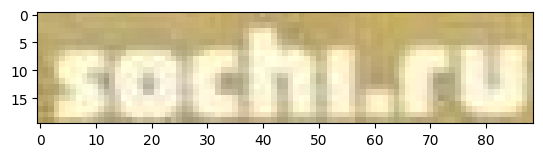

In [61]:
plt.imshow(image)

In [52]:
generated_text

'contemporary'